# Análise Exploratória de Dados de Vinhos Tintos

## Contexto

Como cientista de dados da área de *advanced analytics* em uma empresa especializada na distribuição e vendas de vinhos tintos, meu trabalho é ajudar a empresa a identificar quais vinhos podem ser percebidos como bons pela maioria do público. 

Recentemente, realizamos uma pesquisa em que oferecemos vinhos tintos, com diferentes características físico-químicas, a voluntários. Após experimentarem as amostras, eles atribuíram notas de 0 a 10 para cada vinho. 

A base coletada contém as seguintes informações:

### Medidas de 11 variáveis físico-químicas que caracterizam cada amostra:
1. **Fixed acidity**: medida da acidez devido à presença de ácidos orgânicos de baixa volatilidade (ácido málico, lático, tartárico ou cítrico) no vinho.
2. **Volatile acidity**: medida da acidez devido a ácidos de baixo peso molecular (sobretudo ácido acético) presentes no vinho, responsáveis pelo aroma e gosto de vinagre.
3. **Citric acid**: medida de ácido cítrico no vinho.
4. **Residual sugar**: medida de açúcar residual no vinho, oriundo dos resíduos de açúcar da uva que permanecem após a fermentação.
5. **Chlorides**: medida de cloretos (íons de cloro) no vinho.
6. **Free sulfur dioxide**: medida de dióxido de enxofre livre (não ligado a outras moléculas) no vinho.
7. **Total sulfur dioxide**: medida de dióxido de enxofre total (livre + porção ligada a outras moléculas) no vinho.
8. **Density**: medida da densidade do vinho.
9. **pH**: medida do pH do vinho.
10. **Sulphates**: medida de sulfatos (íons SO₄²⁻) no vinho.
11. **Alcohol**: medida da graduação alcoólica do vinho.

### Variável de resposta:
12. **Quality**: um *score* numérico de qualidade (de 0 a 10), baseado nos dados sensoriais fornecidos pelos voluntários.

## Objetivo

Com base nesses dados, meu objetivo é construir um modelo que consiga distinguir vinhos bons de ruins a partir das suas características físico-químicas. 

Este modelo será essencial para ajudar a empresa a tomar decisões mais direcionadas. Por exemplo, quando produtoras de vinho oferecerem um novo produto para venda, será possível decidir, de forma fundamentada, se vale a pena incluir esse vinho no nosso portfólio, com base na predição da sua qualidade pelo modelo.

## Meu Papel

Meu papel como cientista de dados é claro: **agregar valor ao negócio explorando os dados disponíveis.**  

Antes de construir o modelo, preciso realizar uma análise exploratória detalhada dos dados coletados. Isso inclui compreender as relações entre as variáveis, identificar padrões e preparar o terreno para as próximas etapas de modelagem. 

## Pergunta Principal

A principal pergunta que guiará essa análise é:  
**Como utilizar os dados disponíveis para no futuro, criar um sistema capaz de decidir se um vinho será vendido por nossa empresa ou não?**


--------------------------------------------------------------------------------------------------------------------------------------------------------
Obs.: O enunciado acima foi apenas uma historinha que criei pra motivar o problema em um contexto de negócio. Para maiores informações sobre a coleta e origem real dos dados, veja a página do dataset no repositório UCI machine learning repository, disponível aqui - https://archive.ics.uci.edu/ml/datasets/wine+quality.

--------------------------------------------------------------------------------------------------------------------------------------------------------

## Tarefa 1: Leitura do Arquivo CSV

<span style="color:green">1. Vou começar lendo o arquivo `winequality-red.csv` e construindo um DataFrame utilizando o Pandas.</span>  
<span style="color:green">A partir disso, vou responder às seguintes perguntas:</span>

- <span style="color:orange">Quantas linhas há no dataset?</span>  
- <span style="color:orange">Quantas colunas há no dataset?</span>  
- <span style="color:orange">Quais são os tipos de dados em cada coluna?</span>  
- <span style="color:orange">Existem dados nulos (null ou missing) na base?</span>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                    11.0                  34.0  0.99780  3.51       0.56  \
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [4]:
#Função shape ou olhar ao final do DF
df.shape

(1599, 12)

In [5]:
#Quais os tipos de dados?
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
# Outra maneira é utilizar o info()
df.info()
#Ele é mais completo pois ja retorna outras informações
#Retorna quantida de linhas e colunas
#Os tipos dos dados
#Arquivos non-null(dados nulos, dados missing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#outra maneira de saber se existe dados nulos
df.isnull().sum() #false = 0 ; true = 1

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Tarefa 2: Análise da Distribuição das Variáveis

<span style="color:green">2. Agora, vou trabalhar com a base de vinhos tintos e estudar a distribuição das variáveis numéricas.</span>  
Para cada coluna, vou calcular as principais estatísticas descritivas de:

- **Posição**:  
  - Média (**mean**): Soma de todos os valores dividida pelo número de valores.  
  - Mediana (**50%**): Valor central dos dados quando estão ordenados.  
  - Quartis (**25%**, **50%**, **75%**): Dividem os dados em quatro partes iguais.  

- **Dispersão**:  
  - Desvio padrão (**std**): Mede a variação ou dispersão dos dados em relação à média.  
  - Intervalo Interquartil (**IQR**): Diferença entre o terceiro quartil (**75%**) e o primeiro quartil (**25%**), representando a dispersão central dos dados.  


<span style="color:green">Além disso, se achar interessante, vou visualizar as distribuições de cada variável na amostra usando gráficos.</span>


In [8]:
#describe() - Tabela resumida das estatísticas descritivas.
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar   
count    1599.000000       1599.000000  1599.000000     1599.000000  \
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  1599.000000          1599.000000           1599.000000  1599.000000  \
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

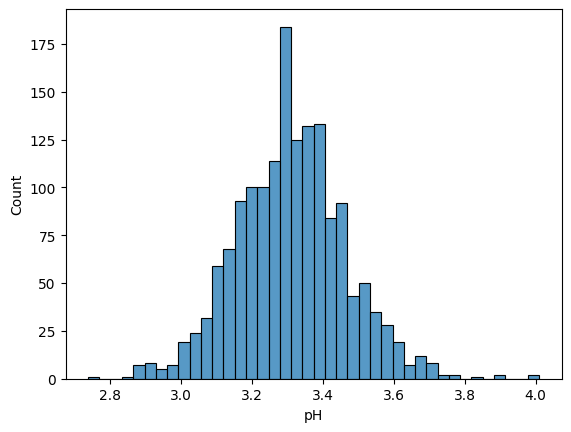

In [9]:
#Visualizando a variável pH em um histograma:
col = "pH"
sns.histplot(data = df, x = col)
plt.show()

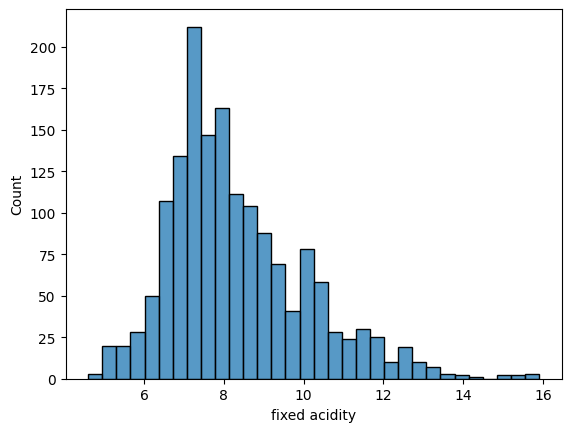

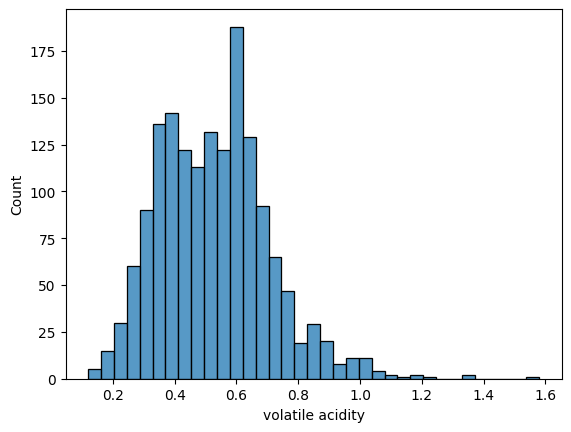

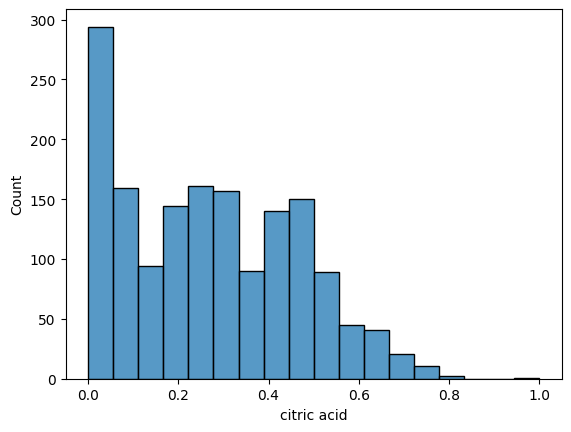

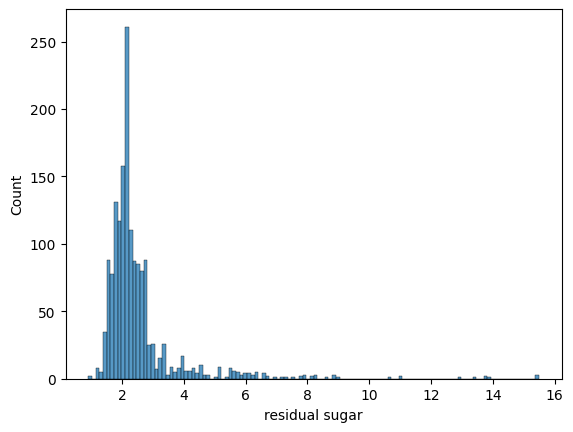

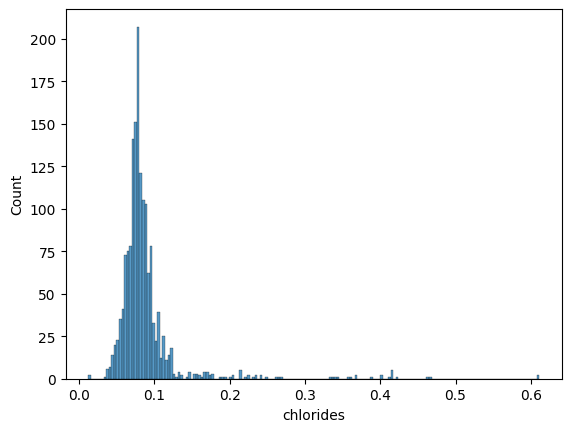

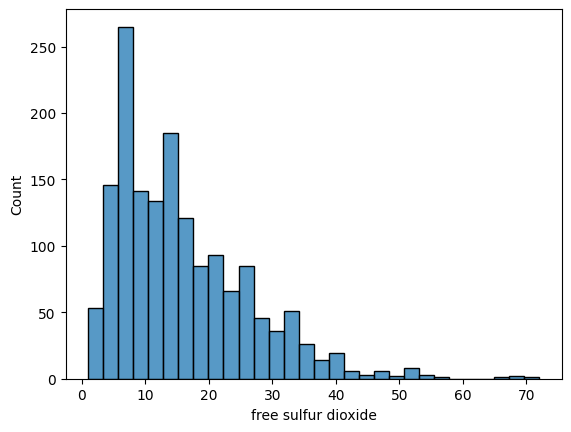

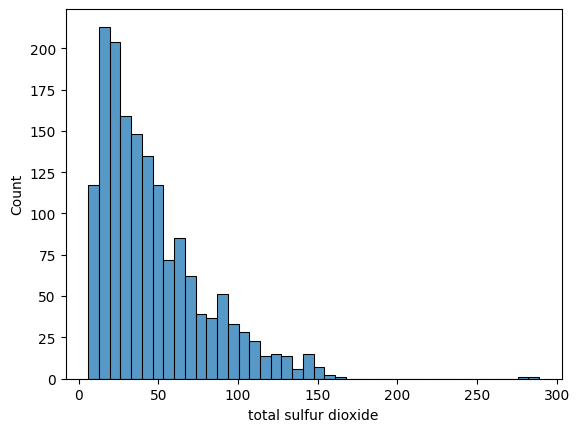

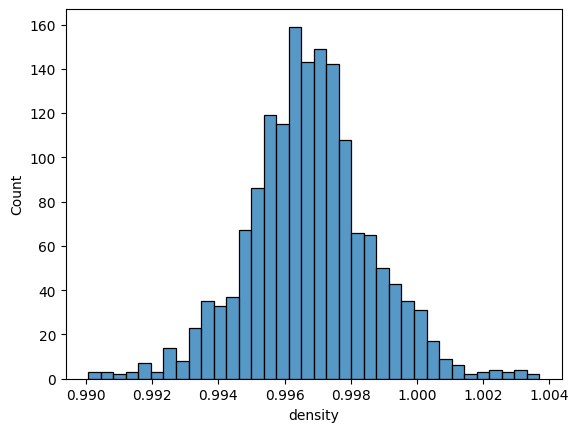

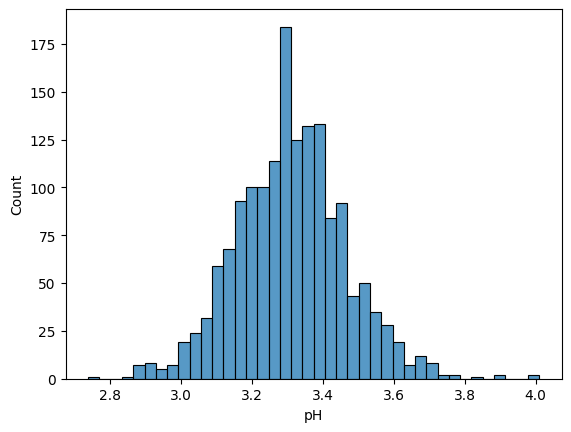

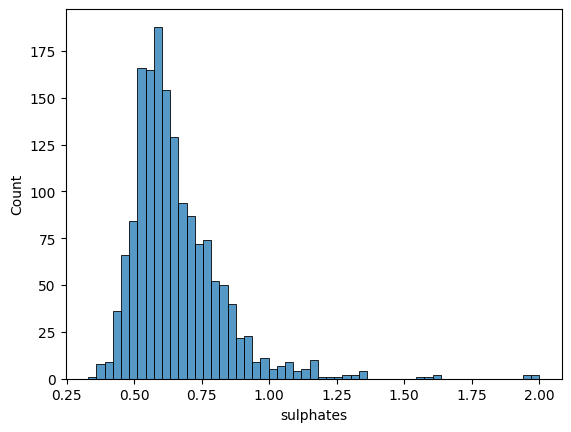

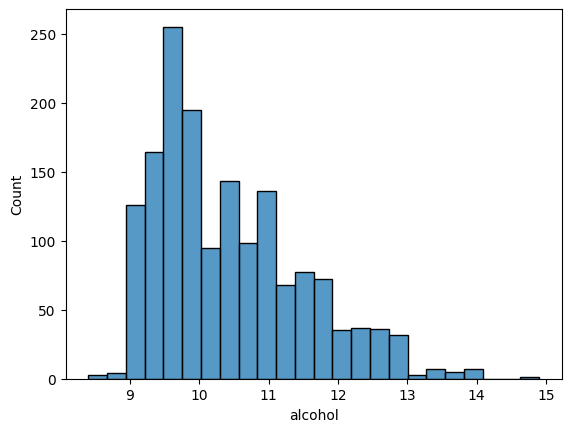

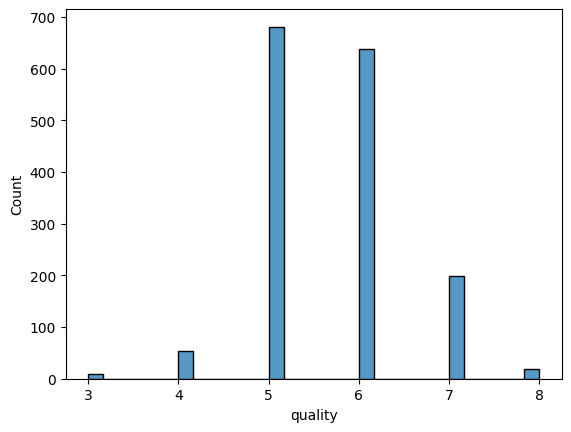

In [10]:
#Loop para visualizar todos as variáveis(colunas)
for col in df.columns:
    sns.histplot(data=df, x= col)
    plt.show()

# Insights sobre os Histogramas de Vinhos

## 1. Álcool (alcohol)
- A distribuição do teor alcoólico parece assimétrica à esquerda (positivamente enviesada).
- A maior concentração de valores está entre **9 e 11% de álcool**, sendo este o intervalo predominante para os vinhos.
- Valores acima de **13%** são raros, indicando que poucos vinhos têm um teor alcoólico muito elevado.

## 2. Cloretos (chlorides)
- A distribuição dos cloretos também é enviesada à direita, com uma longa cauda.
- A maioria dos vinhos tem níveis de cloretos em torno de **0,05 a 0,1**.
- Existem alguns valores muito altos (> 0,2), indicando outliers ou vinhos com características incomuns.

## 3. Ácido Cítrico (citric acid)
- A distribuição do ácido cítrico é levemente decrescente, com maior concentração próxima de **0**.
- Muitos vinhos possuem níveis baixos de ácido cítrico, enquanto níveis mais altos (> 0,6) são menos frequentes.
- O ácido cítrico é utilizado como conservante e também pode influenciar a acidez percebida do vinho.

## 4. **Densidade (density)**  
- A distribuição da densidade é aproximadamente **normal**, com leve simetria.  
- A maioria dos vinhos tem densidade em torno de **0.996 a 0.998**.  
- Existem poucos valores abaixo de **0.992** e acima de **1.002**, indicando que extremos são raros.  
- A densidade do vinho pode estar relacionada ao teor de açúcar residual e ao teor alcoólico.  

## 5. **Acidez Fixa (fixed acidity)**  
- A distribuição é **assimétrica à direita** (positivamente enviesada).  
- A maior concentração de valores está entre **6 e 8**.  
- Existem alguns valores acima de **12**, mas são menos frequentes.  
- A acidez fixa influencia a sensação de frescor do vinho e pode estar associada a diferentes tipos de uvas e processos de fermentação.  

## 6. **Dióxido de Enxofre Livre (free sulfur dioxide)**  
- A distribuição é fortemente **assimétrica à direita**, indicando que a maioria dos vinhos tem baixos níveis de dióxido de enxofre.  
- A maior parte dos valores está abaixo de **20 mg/L**, com uma concentração significativa entre **0 e 15 mg/L**.  
- Existem alguns valores extremos acima de **50 mg/L**, que podem indicar vinhos mais preservados ou outliers.  
- O dióxido de enxofre é um conservante usado para evitar a oxidação e o crescimento de microrganismos indesejados.  

## 7. pH
- A distribuição do pH é aproximadamente simétrica e apresenta formato de uma curva normal.
- A maioria dos vinhos tem valores de pH concentrados entre **3,2 e 3,4**, indicando que esses vinhos possuem acidez moderada.
- Há poucas ocorrências de valores extremos de pH abaixo de **3,0** ou acima de **3,8**, sugerindo que a maioria dos vinhos mantém um nível de acidez consistente.

## 8. Açúcar Residual (Residual Sugar)
- A distribuição é altamente enviesada à direita, com uma longa cauda.
- A maior parte dos vinhos apresenta níveis de açúcar residual em torno de **2 a 4 g/L**, o que é comum para vinhos secos ou levemente doces.
- Valores muito altos (acima de **8 g/L**) são raros, indicando vinhos mais doces ou outliers na base.

## 9. Sulfitos (Sulphates)
- A distribuição dos sulfitos é assimétrica à direita, com uma cauda longa.
- A maioria dos vinhos possui teores de sulfitos entre **0,5 e 0,75 g/L**, que é típico para a preservação de vinhos.
- Valores acima de **1,0 g/L** são menos frequentes, indicando que poucos vinhos utilizam concentrações elevadas de sulfitos.

## 10. Dióxido de Enxofre Total (total sulfur dioxide)
- A distribuição apresenta uma assimetria à direita (positivamente enviesada), com uma longa cauda estendendo-se até valores mais altos.
- A maior concentração de valores está entre **0 e 50 mg/L**, indicando que a maioria dos vinhos possui baixos níveis de dióxido de enxofre total.
- Existem alguns valores bastante altos (> 150 mg/L), que podem indicar vinhos com conservantes adicionados em maior quantidade.

## 11. Acidez Volátil (volatile acidity)
- A distribuição tem um formato aproximadamente normal, mas com uma leve assimetria à direita.
- A maior parte dos valores está concentrada entre **0,3 e 0,8 g/L**, sugerindo que a maioria dos vinhos possui um nível moderado de acidez volátil.
- Há uma pequena quantidade de vinhos com valores acima de **1,0 g/L**, o que pode indicar um possível impacto no sabor e qualidade do vinho, já que altos níveis de acidez volátil podem ser indesejáveis.

## 12. Qualidade (quality)
- A distribuição da qualidade dos vinhos é **discreta e concentrada em poucos valores**, sugerindo que a avaliação segue uma escala limitada.
- Os valores mais comuns estão em **5 e 6**, sendo que **o nível 5 é o mais frequente (~680 ocorrências)**, seguido de perto pelo nível 6 (~640 ocorrências).
- Vinhos com qualidade **7 ou superior são menos comuns**, com uma queda significativa na frequência conforme a pontuação aumenta.
- Pouquíssimos vinhos possuem qualidade **3 ou 8**, sugerindo que vinhos extremamente ruins ou excelentes são raros na amostra.
- A distribuição tem um formato aproximadamente **simétrico** ao redor dos valores centrais (5 e 6), indicando que a maioria dos vinhos se concentra em uma qualidade mediana.

---

In [11]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [12]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

## Calculo do IQR

In [13]:
statistics = df.describe()
iqr_value = statistics.loc['75%'] - statistics.loc['25%']
iqr_value

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64

## Tarefa 3: Detecção de Outliers

### 3. Investigando Outliers na Base de Vinhos Tintos

Outliers são valores que se distanciam significativamente do restante dos dados, podendo ser muito maiores ou menores do que a maioria dos valores. Eles podem indicar erros de medição, variabilidade natural ou casos raros e interessantes. Identificar e tratar outliers é importante para garantir a precisão da análise e evitar distorções nas estatísticas.

### Método de Detecção Escolhido

Para identificar outliers, vou utilizar o **Z-score**.

- **Justificativa:** O Z-score é uma medida que indica quantos desvios padrão um valor está distante da média. Valores com um Z-score maior que 3 ou menor que -3 são geralmente considerados outliers. Este método é útil porque a análise de Z-scores permite identificar dados que se afastam da distribuição normal.

Após a aplicação do método, indicarei quais colunas apresentam outliers e quais não apresentam.



In [14]:
for col in df.columns:
    #col = "pH"
    m ,s = df[col].mean(), df[col].std()

    obs_eh_outlier = df[col].apply(lambda x: (x - m)/s).apply(lambda x: abs(x)>3)
    outliers = np.where(obs_eh_outlier)
    print(f"Os ouliers da coluna {col} são: \n\n{outliers}")
    print(f"\n{'='*80}\n")

Os ouliers da coluna fixed acidity são: 

(array([243, 244, 347, 374, 381, 391, 442, 544, 554, 555, 557, 652],
      dtype=int64),)


Os ouliers da coluna volatile acidity são: 

(array([  38,  120,  126,  127,  199,  672,  690,  724, 1299, 1312],
      dtype=int64),)


Os ouliers da coluna citric acid são: 

(array([151], dtype=int64),)


Os ouliers da coluna residual sugar são: 

(array([  33,  163,  164,  274,  324,  325,  396,  400,  480,  494,  595,
        649,  652,  911,  917,  923, 1043, 1071, 1074, 1079, 1081, 1186,
       1235, 1244, 1434, 1435, 1474, 1476, 1574, 1589], dtype=int64),)


Os ouliers da coluna chlorides são: 

(array([  17,   19,   42,   81,   83,  106,  147,  151,  169,  181,  226,
        240,  258,  281,  291,  451,  568,  692,  730,  754,  776,  777,
       1051, 1165, 1260, 1319, 1370, 1372, 1374, 1558, 1570], dtype=int64),)


Os ouliers da coluna free sulfur dioxide são: 

(array([  14,   15,   57,  396,  400,  584,  925,  926,  982, 1131, 1154,
       11

## Tarefa 4: Estudo da Coluna "Quality" - Variável Resposta

### 4. Investigando a Coluna "Quality" na Base de Vinhos Tintos

A coluna **`quality`** contém a variável resposta do nosso problema, que representa a qualidade do vinho. Agora, vou responder às seguintes perguntas sobre essa variável:

### 1. **Essa é uma variável contínua ou discreta?**

- A variável `quality` é **discreta**, pois ela assume valores inteiros específicos, no intervalo de 0 a 10, e não pode assumir valores fracionários.

### 2. **Como as notas estão distribuídas? Quais as notas mais/menos comuns?**

- Vou analisar a distribuição das notas e identificar quais notas são mais ou menos comuns na base de dados.

### 3. **Faz sentido discretizar esta variável em dois níveis categóricos?**

- Vou investigar se seria útil ou adequado transformar essa variável contínua em uma variável categórica com dois níveis, com base em um valor de corte específico.

### 4. **Se sim, qual seria o valor de corte, e qual seria o significado de cada nível categórico?**

- Caso a discretização faça sentido, vou definir o valor de corte e explicar o significado de cada nível categórico, como "Boa" ou "Ruim" qualidade do vinho.

### 5. **Como estes dois níveis categóricos estão distribuídos?**

- Por fim, vou analisar como as distribuições dos dois níveis categóricos (após a discretização) estão distribuídas na base de vinhos tintos.


In [15]:
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [16]:
#as mais comuns
#df['quality'].value_counts(normalize=True) # Frequencia relativa
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

    # 2 - 
        As mais comuns são as notas 5 e 6 
        As menos comuns são as notas 8 e 3
    # 3 -
        Sim, faz sentido discretizar a variável `quality` em dois níveis categóricos, pois o objetivo final é tomar uma decisão sobre a venda ou não de um vinho, com base em sua qualidade. Dividir a variável em categorias facilita a interpretação e a aplicação de um modelo que ajude a empresa a tomar decisões de vendas de forma mais simples e objetiva.
    # 4 e 5 -
        Essa pergunta irei responder mais para frente. A ideia é diminuir os valores categóricos de 6 para apenas 2(bom ou ruim).
        Mas a ideia seria parecida com isso:

       

In [17]:
corte = 5
binarizacao = df['quality'].apply(lambda x: "bom" if x > corte else "ruim")
binarizacao.nunique()


2

In [18]:
binarizacao.value_counts()

quality
bom     855
ruim    744
Name: count, dtype: int64

In [19]:
#adicionando a coluna bom_ou_ruim no df
df['bom_ou_ruim'] = binarizacao
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                    11.0                  34.0  0.99780  3.51       0.56  \
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality bom_ou_ruim  
0         9.4        5        ruim  
1         9.8        5        ruim  
2         9.8        5        ruim  
3         9.8        6         bom  
4         9.4        5        ruim  
...       ...      ...         ...  
1594     10.5        5        ruim  
1595     11.2        6         bom  
1596     11.0        6         bom  
1597     10.2        5        ruim  
1598     11.0        6         bom  

[1599 rows x 13 columns]

## Tarefa 5: Correlação entre Variáveis e Target "Quality"

Utilizando a base de vinhos tintos, calcule e/ou visualize a correlação entre as variáveis e o target `quality`.

- Estude a correlação entre as features e o target `quality` e responda se há correlações fortes.
- Plote a relação entre cada uma das features e o target utilizando scatterplots.

Com base nas análises acima, responda: é uma boa ideia modelar o problema como regressão? Se sim, quais métodos de aprendizagem você utilizaria?


In [20]:
corr = df.drop(columns='bom_ou_ruim').corr() #Correlações lineares
# corr = df.drop(columns='bom_ou_ruim').corr(method='spearman') #Spearman correlações monotônicas/ mas tbm tem relações fracas
corr['quality'].sort_values() #Não existe uma correlação forte entre nenhuma das caracteristicas com a variável resposta

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

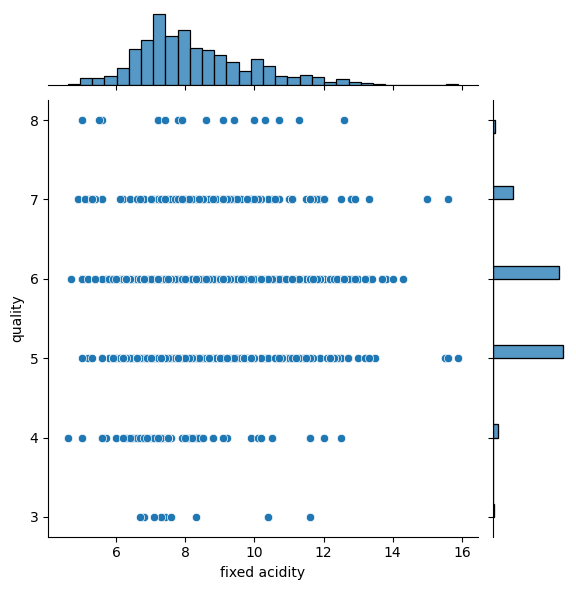

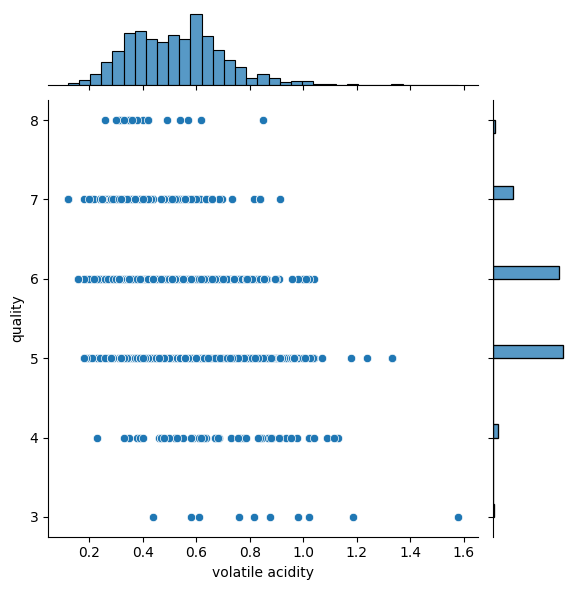

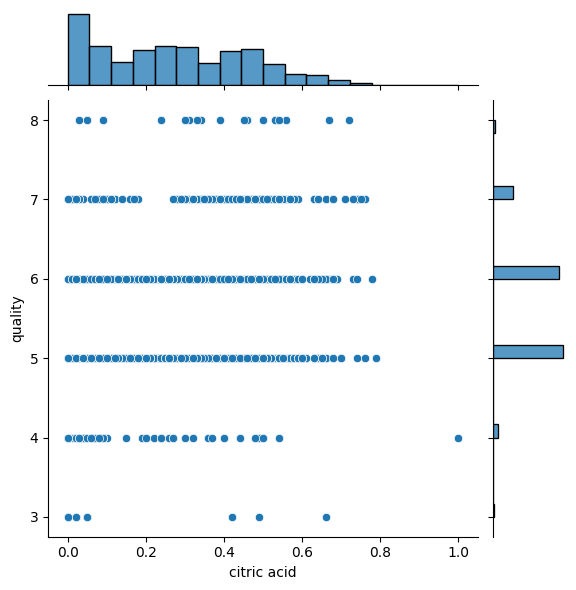

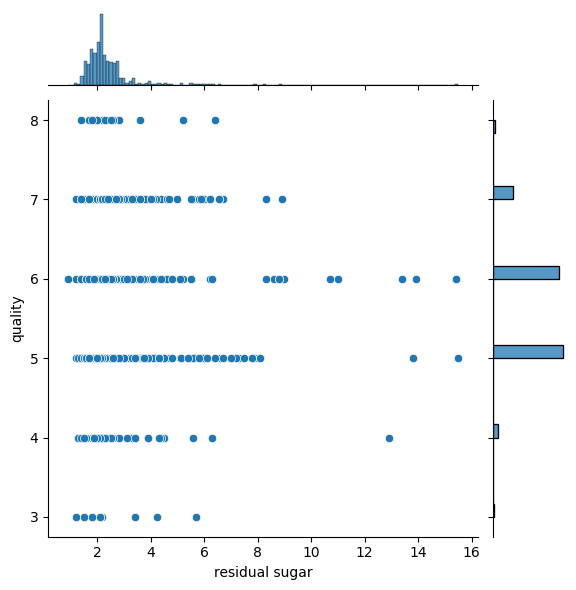

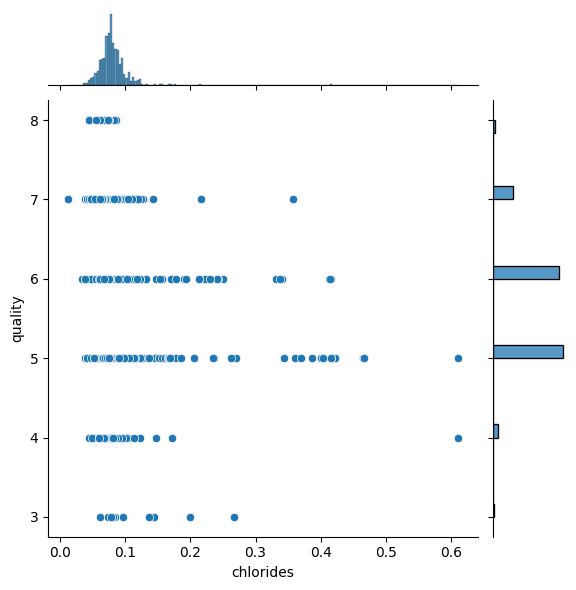

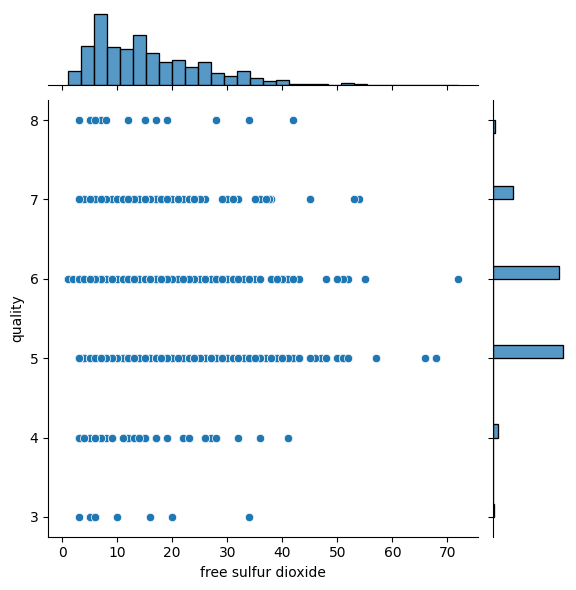

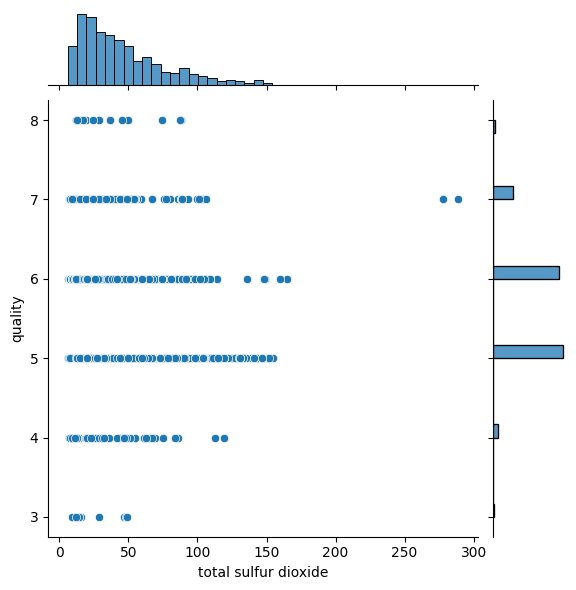

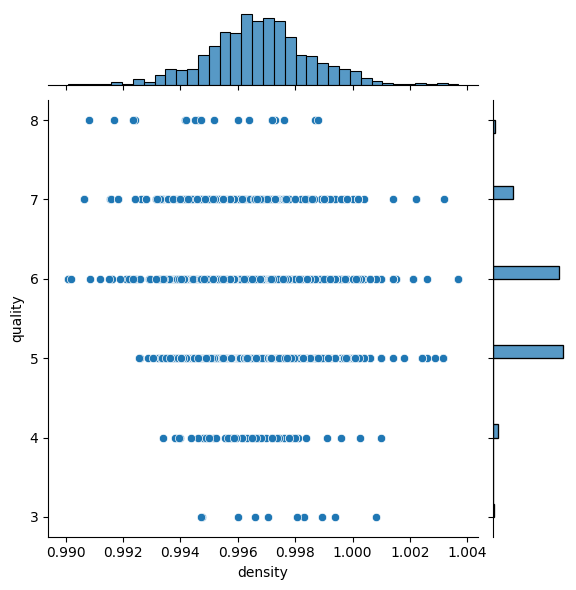

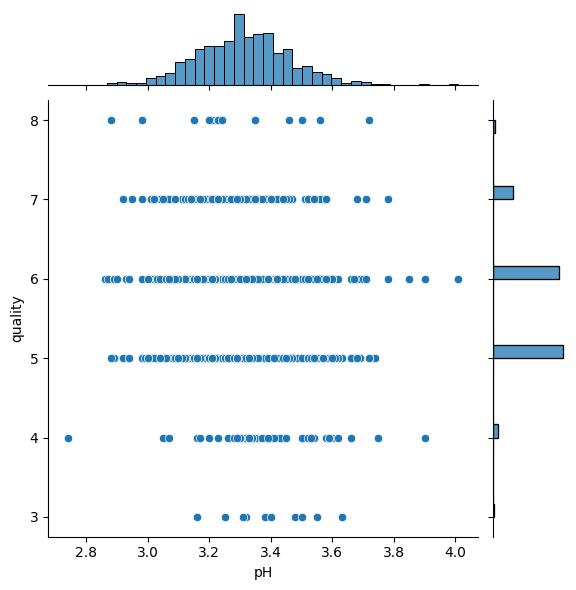

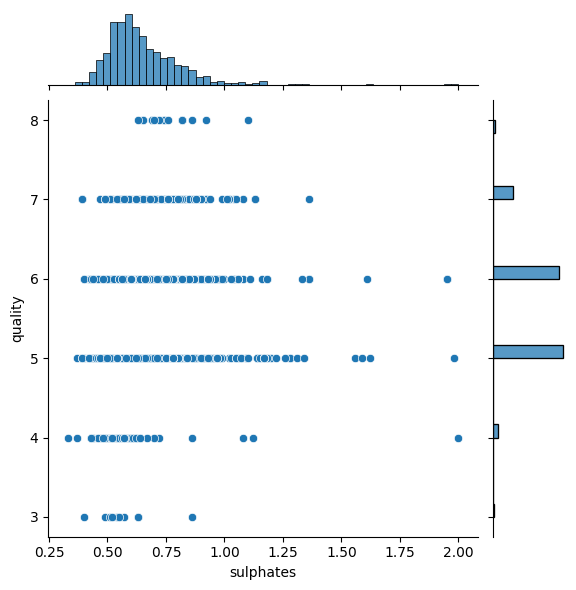

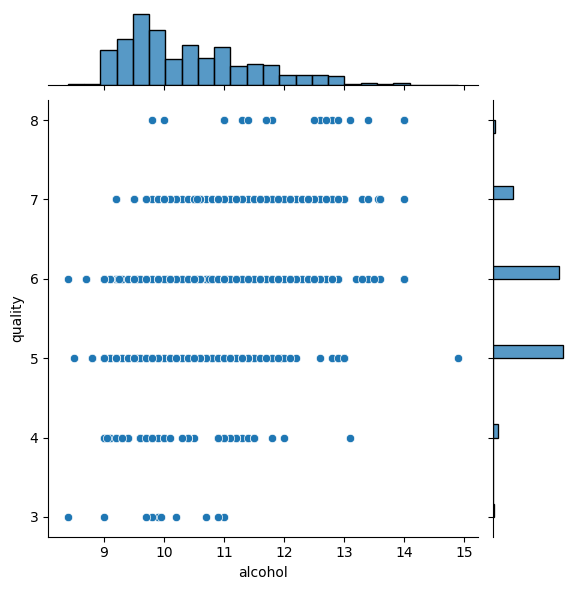

In [21]:
for col in df.drop(columns=['quality', 'bom_ou_ruim']):
    sns.jointplot(data=df, x=col ,y='quality')
    plt.show()

- Não aparenta ter um relação muito clara, varias notas diferentes com os mesmos valores

-  Não existe uma correlação forte entre nenhuma das caracteristicas com a variável resposta(quality).
-  Utilizar um modelo de regressão aqui não sera eficiente!

## Tarefa 6: Discretização da Variável "Quality" em Classes Binárias

Utilizando a base de vinhos tintos, vou discretizar a variável resposta `quality` em **dois níveis categóricos** para transformar o problema em um problema de **classificação binária**.

- **Valor de corte**: Vou utilizar o valor de corte que torne as classes o mais igualmente distribuídas possível, ou seja, minimizando o desbalanceamento entre as classes. Para isso, vou testar todos os valores de corte possíveis.

Após determinar o valor de corte, vou responder às seguintes perguntas:

1. Qual o significado qualitativo de cada uma das classes? O que cada classe representa em termos de qualidade do vinho?
2. Esta discretização faz sentido? Se sim, irei nomear as classes de forma clara para facilitar análises posteriores.

Como sugestão, o **dataframe** com esta nova variável resposta binária será salvo em um arquivo para que possa ser facilmente lido e utilizado nas próximas análises.

In [22]:
df['quality'].sort_values().unique()

array([3, 4, 5, 6, 7, 8], dtype=int64)


Distribuição das classes com corte = 3



quality
bom     1589
ruim      10
Name: count, dtype: int64

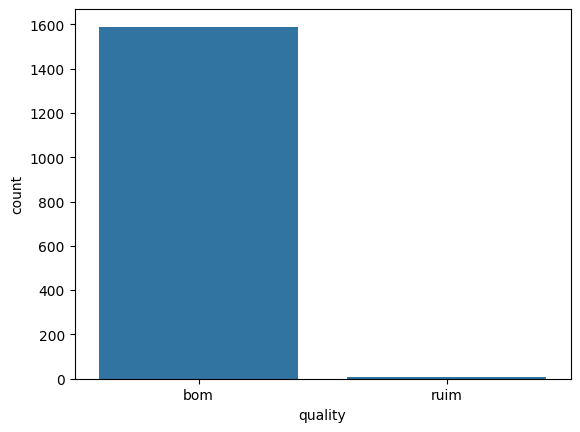


Distribuição das classes com corte = 4



quality
bom     1536
ruim      63
Name: count, dtype: int64

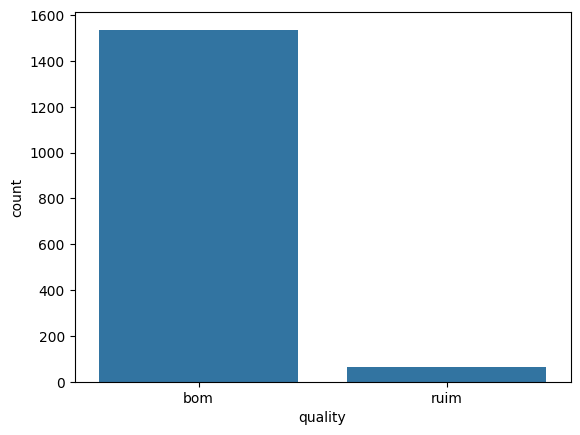


Distribuição das classes com corte = 5



quality
bom     855
ruim    744
Name: count, dtype: int64

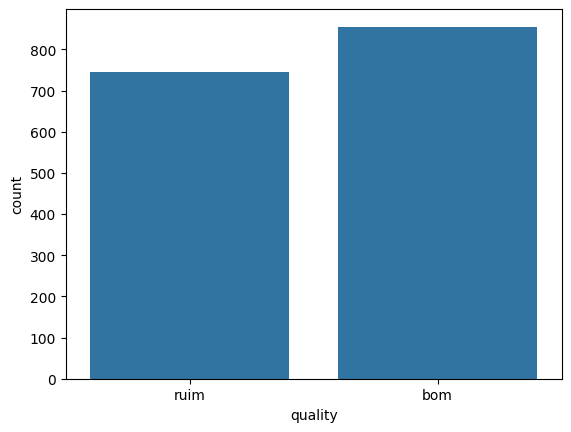


Distribuição das classes com corte = 6



quality
ruim    1382
bom      217
Name: count, dtype: int64

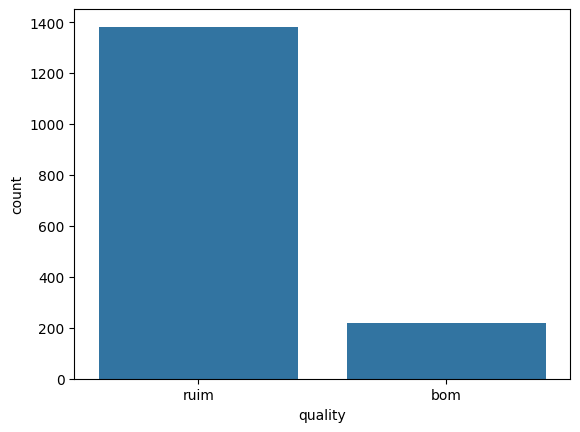


Distribuição das classes com corte = 7



quality
ruim    1581
bom       18
Name: count, dtype: int64

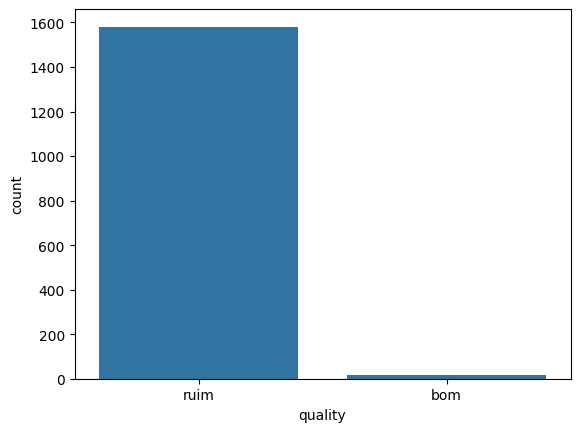


Distribuição das classes com corte = 8



quality
ruim    1599
Name: count, dtype: int64

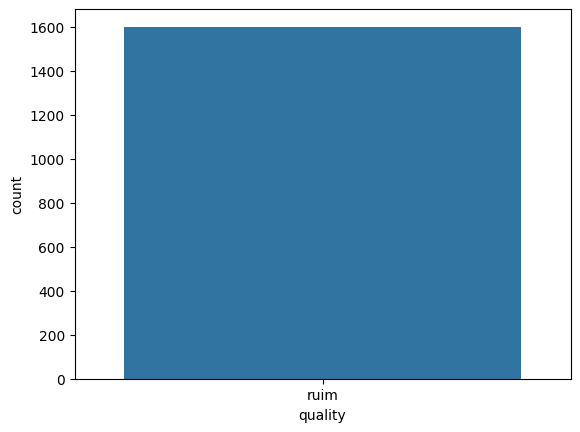

In [23]:
for corte in df['quality'].sort_values().unique():
    binarizacao = df['quality'].apply(lambda x: "bom" if x > corte else "ruim")
    print(f"\nDistribuição das classes com corte = {corte}\n")
    display(binarizacao.value_counts())

    sns.countplot(x=binarizacao)
    plt.show()

- Corte 3 e 4:
    Desbalanço muito grande, muitos vinhos considerados "bons" com relativamente baixa.
- Corte 6, 7 e 8:
    Desbalanço muito grande, passa a ter muito mais vinhos "ruins" que "bons"
- Corte 5:
    É a que possui o melhor balanço

In [24]:
#Retirando a coluna quality
df = df.drop(columns = 'quality')

In [25]:
df.to_csv('winequality-red_binary_target.csv')

### 7) Análise da Separabilidade das Classes

Considere a base de vinhos tintos com a variável `quality` discretizada em duas classes:

- **"Bom"**: para notas maiores que 5.
- **"Ruim"**: caso contrário.

Vamos agora analisar a separabilidade das duas classes do problema. Para isso, faça:

- Visualize as distribuições das features, com indicação dos diferentes níveis categóricos do target;
- Visualize as projeções dos dados em cada um dos subespaços de pares de features, com indicação dos níveis categóricos do target;
- **Responda**: com base nesta análise, o problema é linearmente separável?

In [26]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar   
count    1599.000000       1599.000000  1599.000000     1599.000000  \
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  1599.000000          1599.000000           1599.000000  1599.000000  \
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol  
count  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983  
std       0.154386     0.169507     1.065668  
min       2.740000     0.330000     8.400000  
25%       3.210000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.730000    11.100000  
max       4.010000     2.000000    14.900000

In [27]:
#Calculando a media dentro dos vinhos bons e dos vinhos Ruins
df.groupby("bom_ou_ruim").describe()

fixed acidity                                                  
                    count      mean       std  min  25%  50%   75%   max   
bom_ou_ruim                                                                
bom                 855.0  8.474035  1.862795  4.7  7.1  8.0  9.65  15.6  \
ruim                744.0  8.142204  1.572396  4.6  7.1  7.8  8.90  15.9   

            volatile acidity            ... sulphates       alcohol   
                       count      mean  ...       75%   max   count   
bom_ou_ruim                             ...                           
bom                    855.0  0.474146  ...      0.77  1.95   855.0  \
ruim                   744.0  0.589503  ...      0.65  2.00   744.0   

                                                               
                  mean       std  min   25%   50%   75%   max  
bom_ou_ruim                                                    
bom          10.855029  1.106109  8.4  10.0  10.8  11.7  14.0  
ruim          9.926478  0.758007  8.4   9.4   9.7  10.3  14.9  

[2 rows x 88 columns]

In [28]:
df.columns[:-1] #Tirando a coluna boa ou ruim dos histogramas e boxplot

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

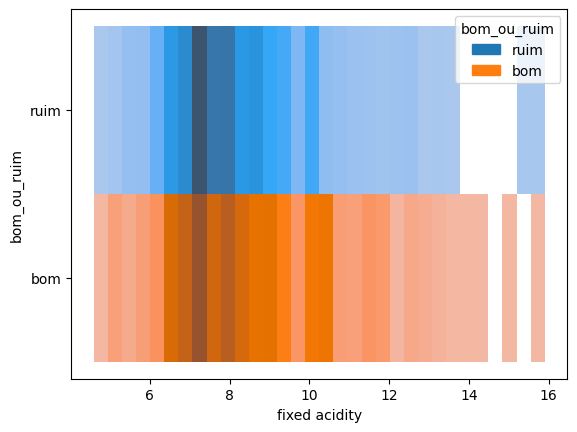

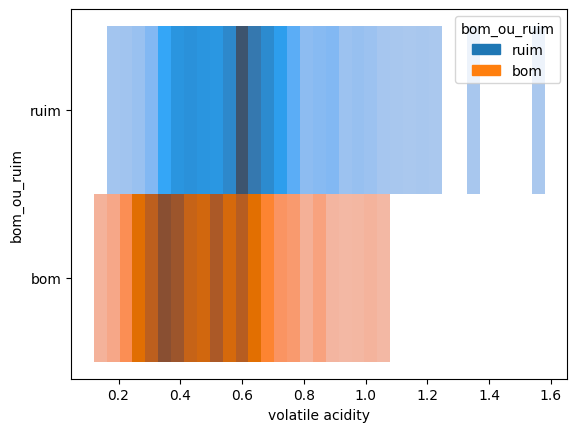

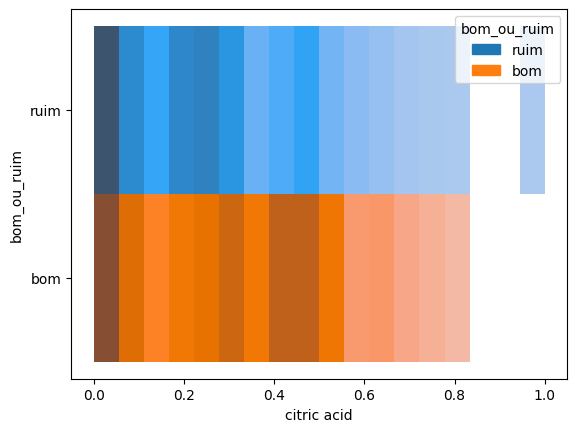

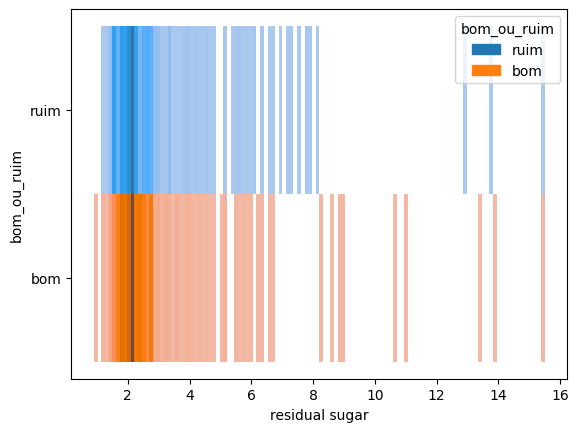

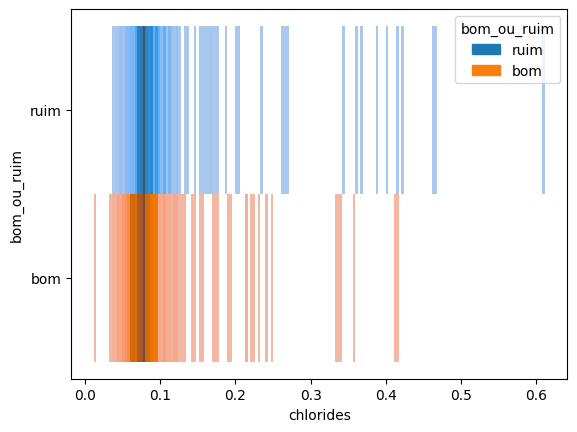

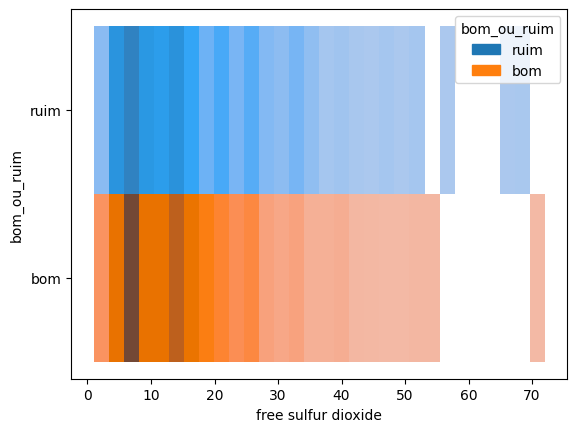

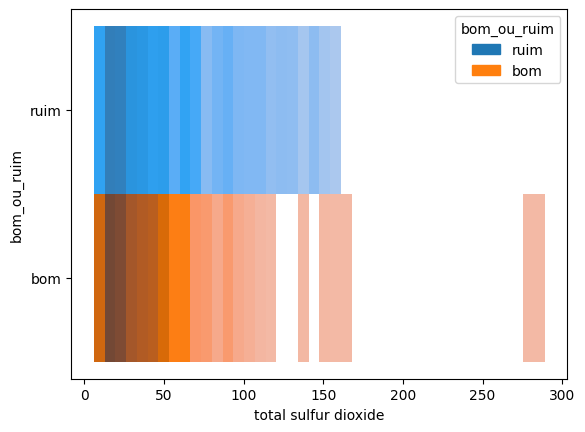

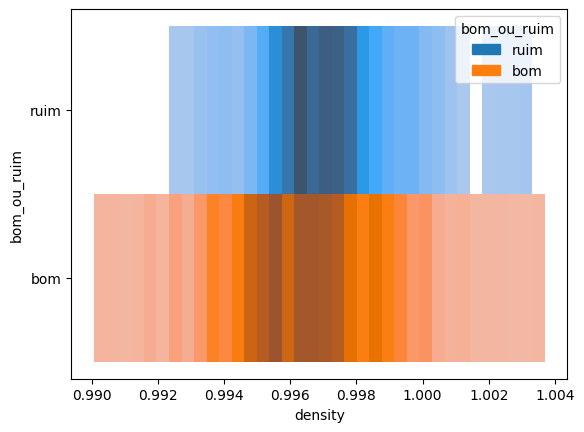

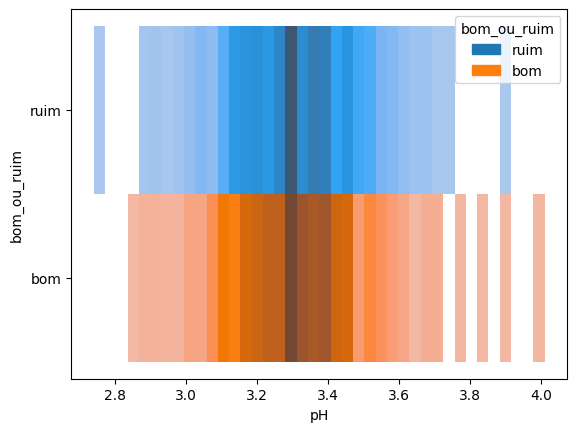

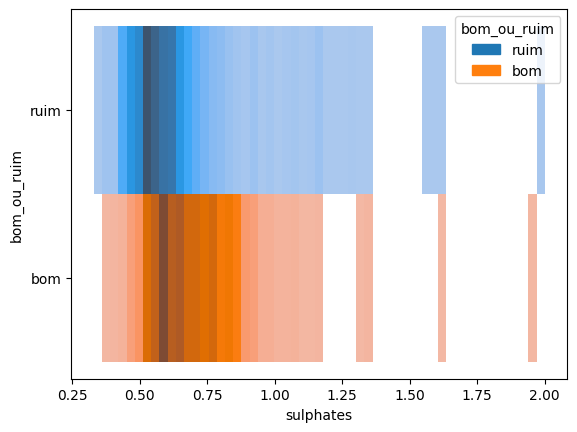

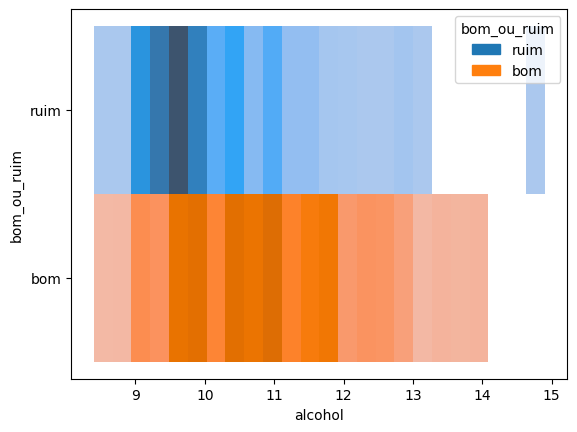

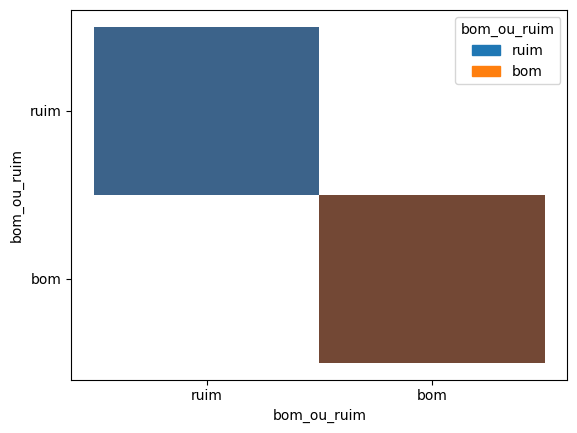

In [29]:
#Vendo o gráfico de cima
for col in df.columns:
    sns.histplot(data = df, x = col, y='bom_ou_ruim' ,hue = 'bom_ou_ruim', kde = True)
    plt.show()

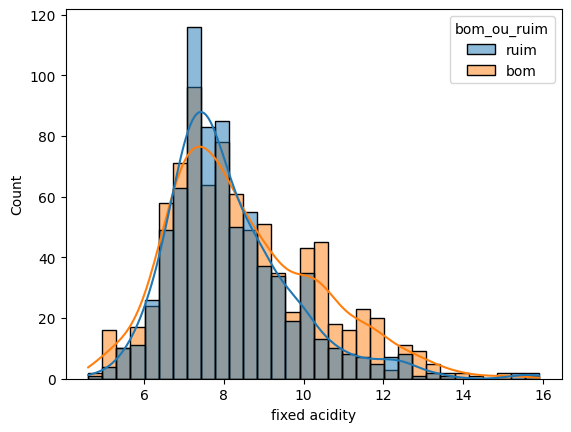

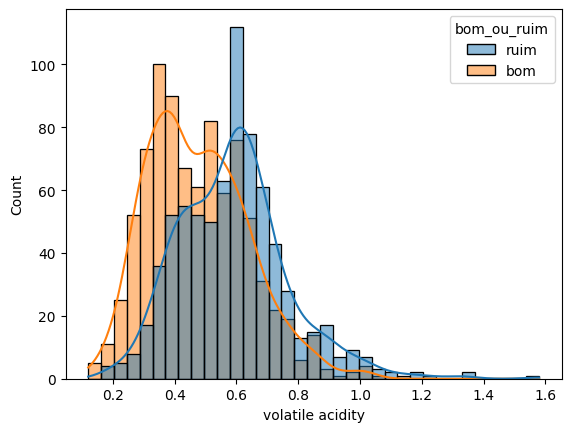

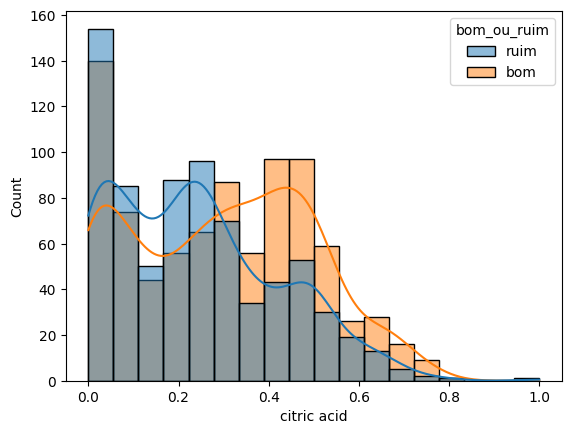

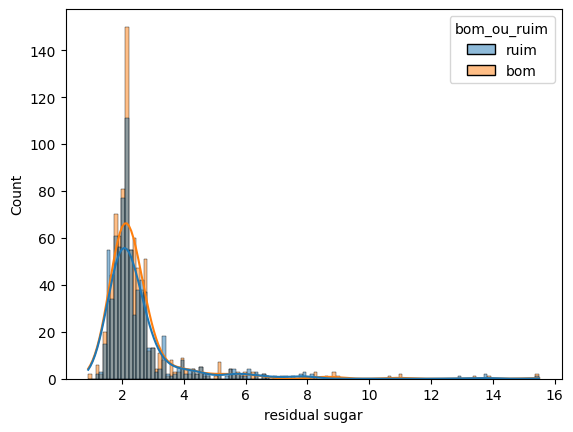

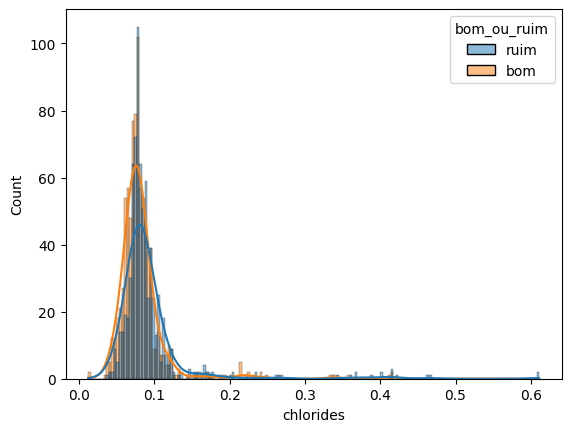

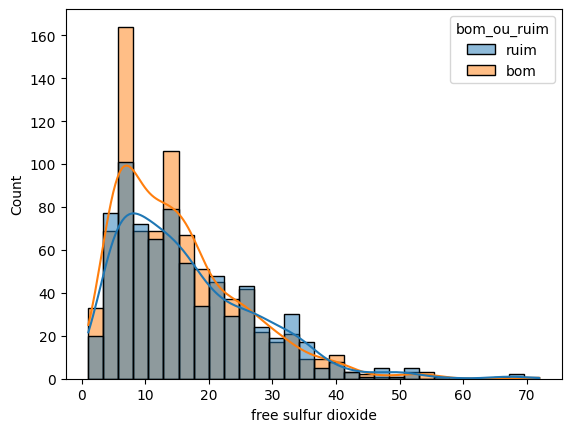

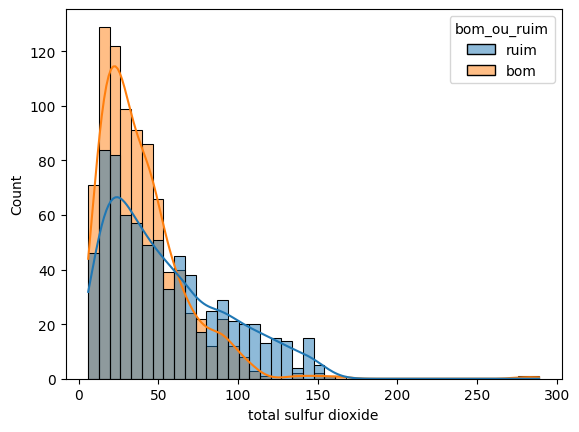

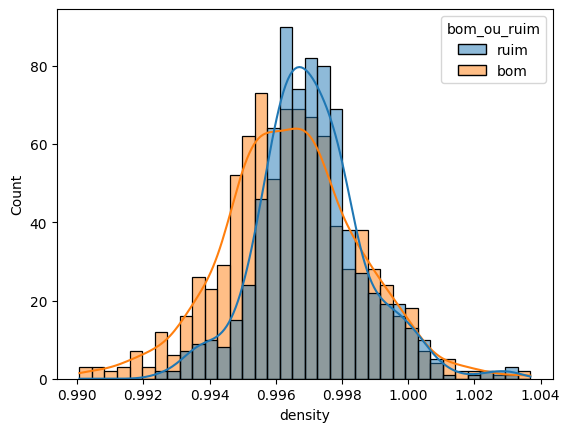

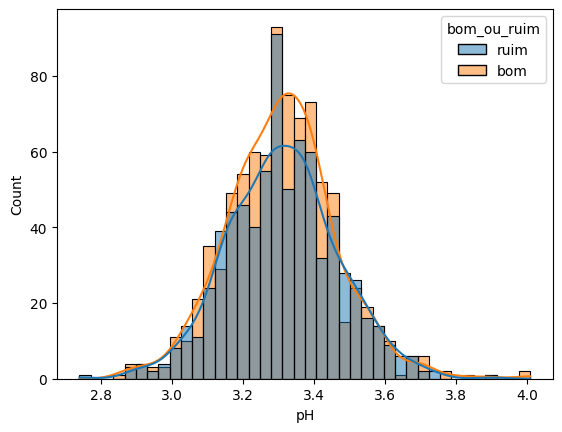

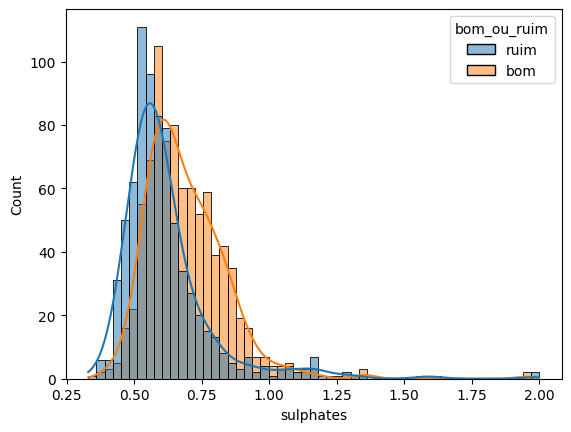

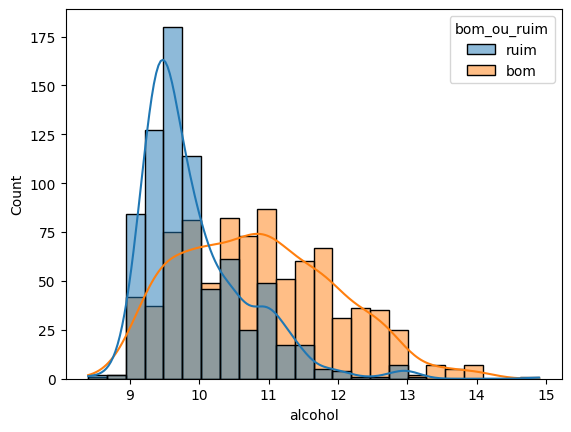

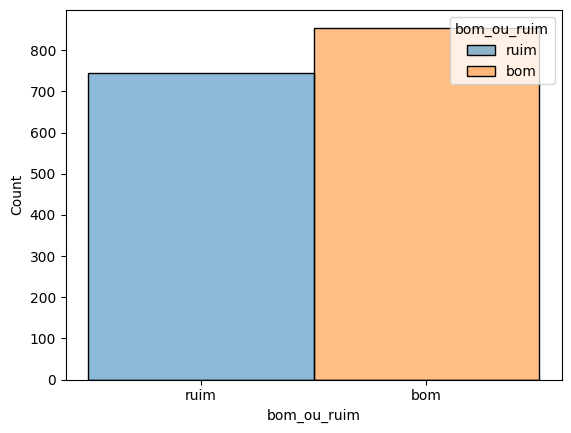

In [30]:
for col in df.columns:
    sns.histplot(data = df, x = col, hue = 'bom_ou_ruim', kde = True)
    plt.show()

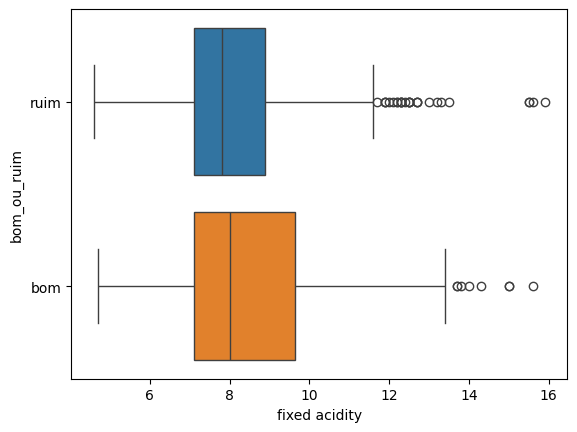

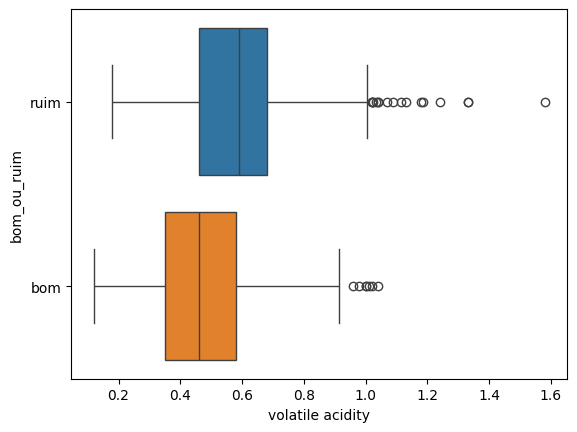

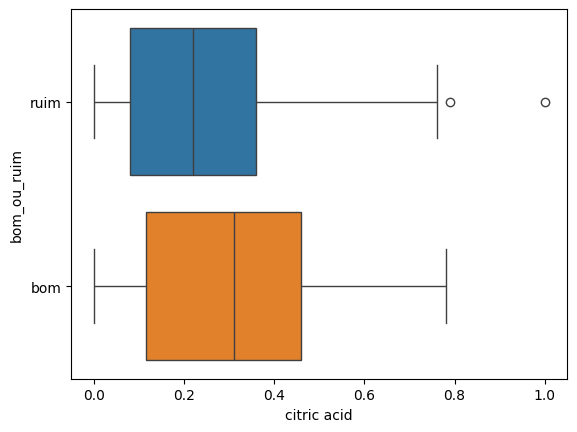

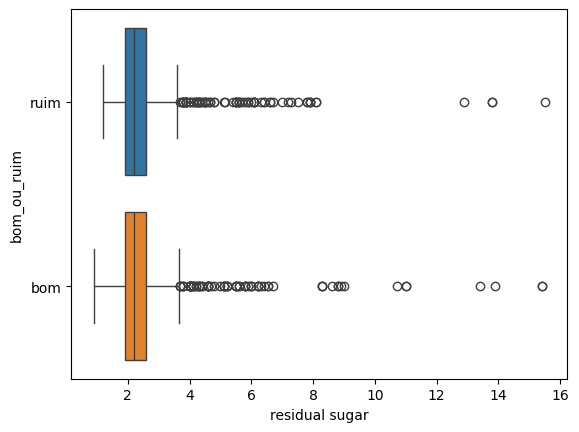

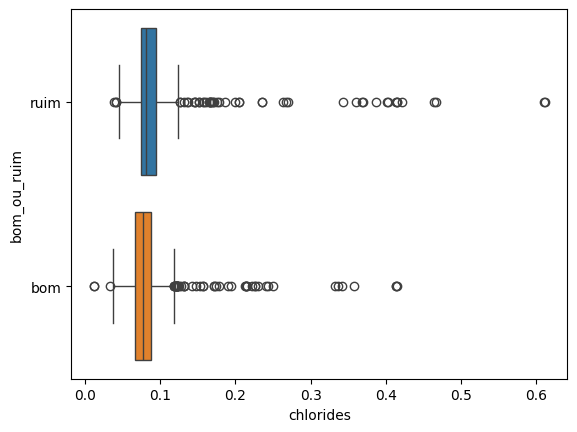

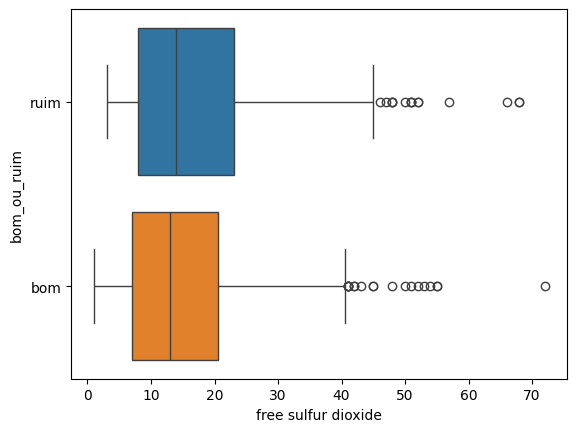

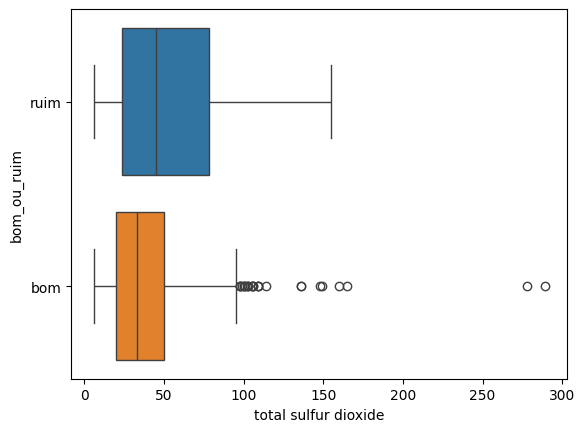

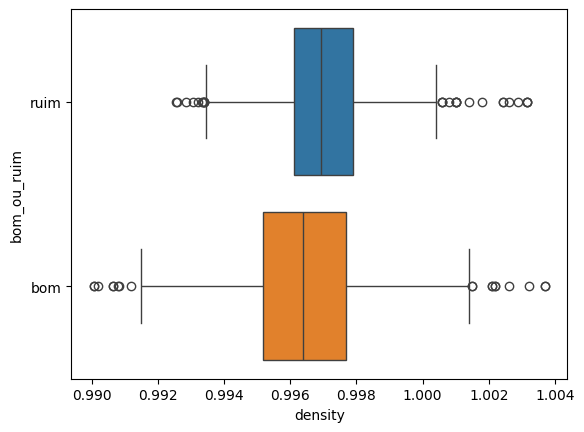

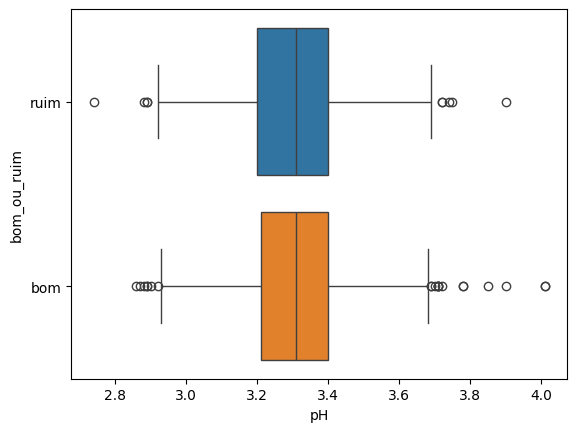

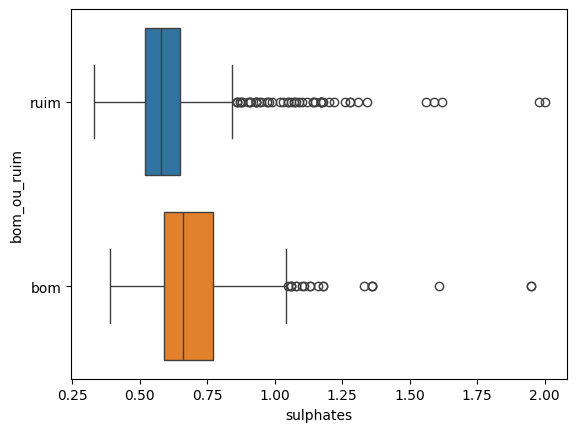

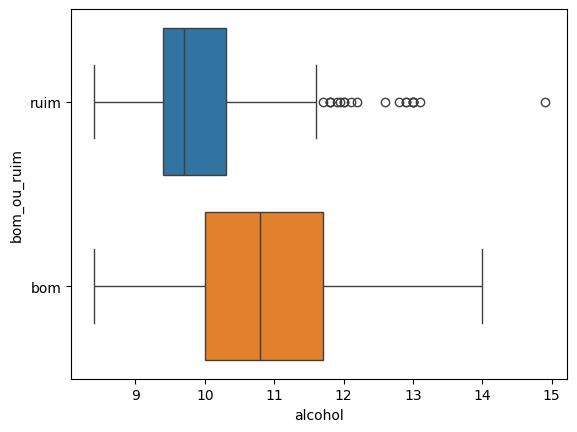

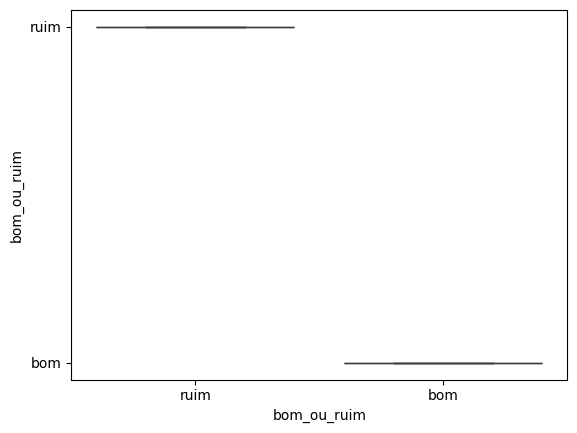

In [31]:
for col in df.columns:
    sns.boxplot(data = df, x = col, y='bom_ou_ruim',hue = 'bom_ou_ruim')
    plt.show()

c:\Users\Tayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


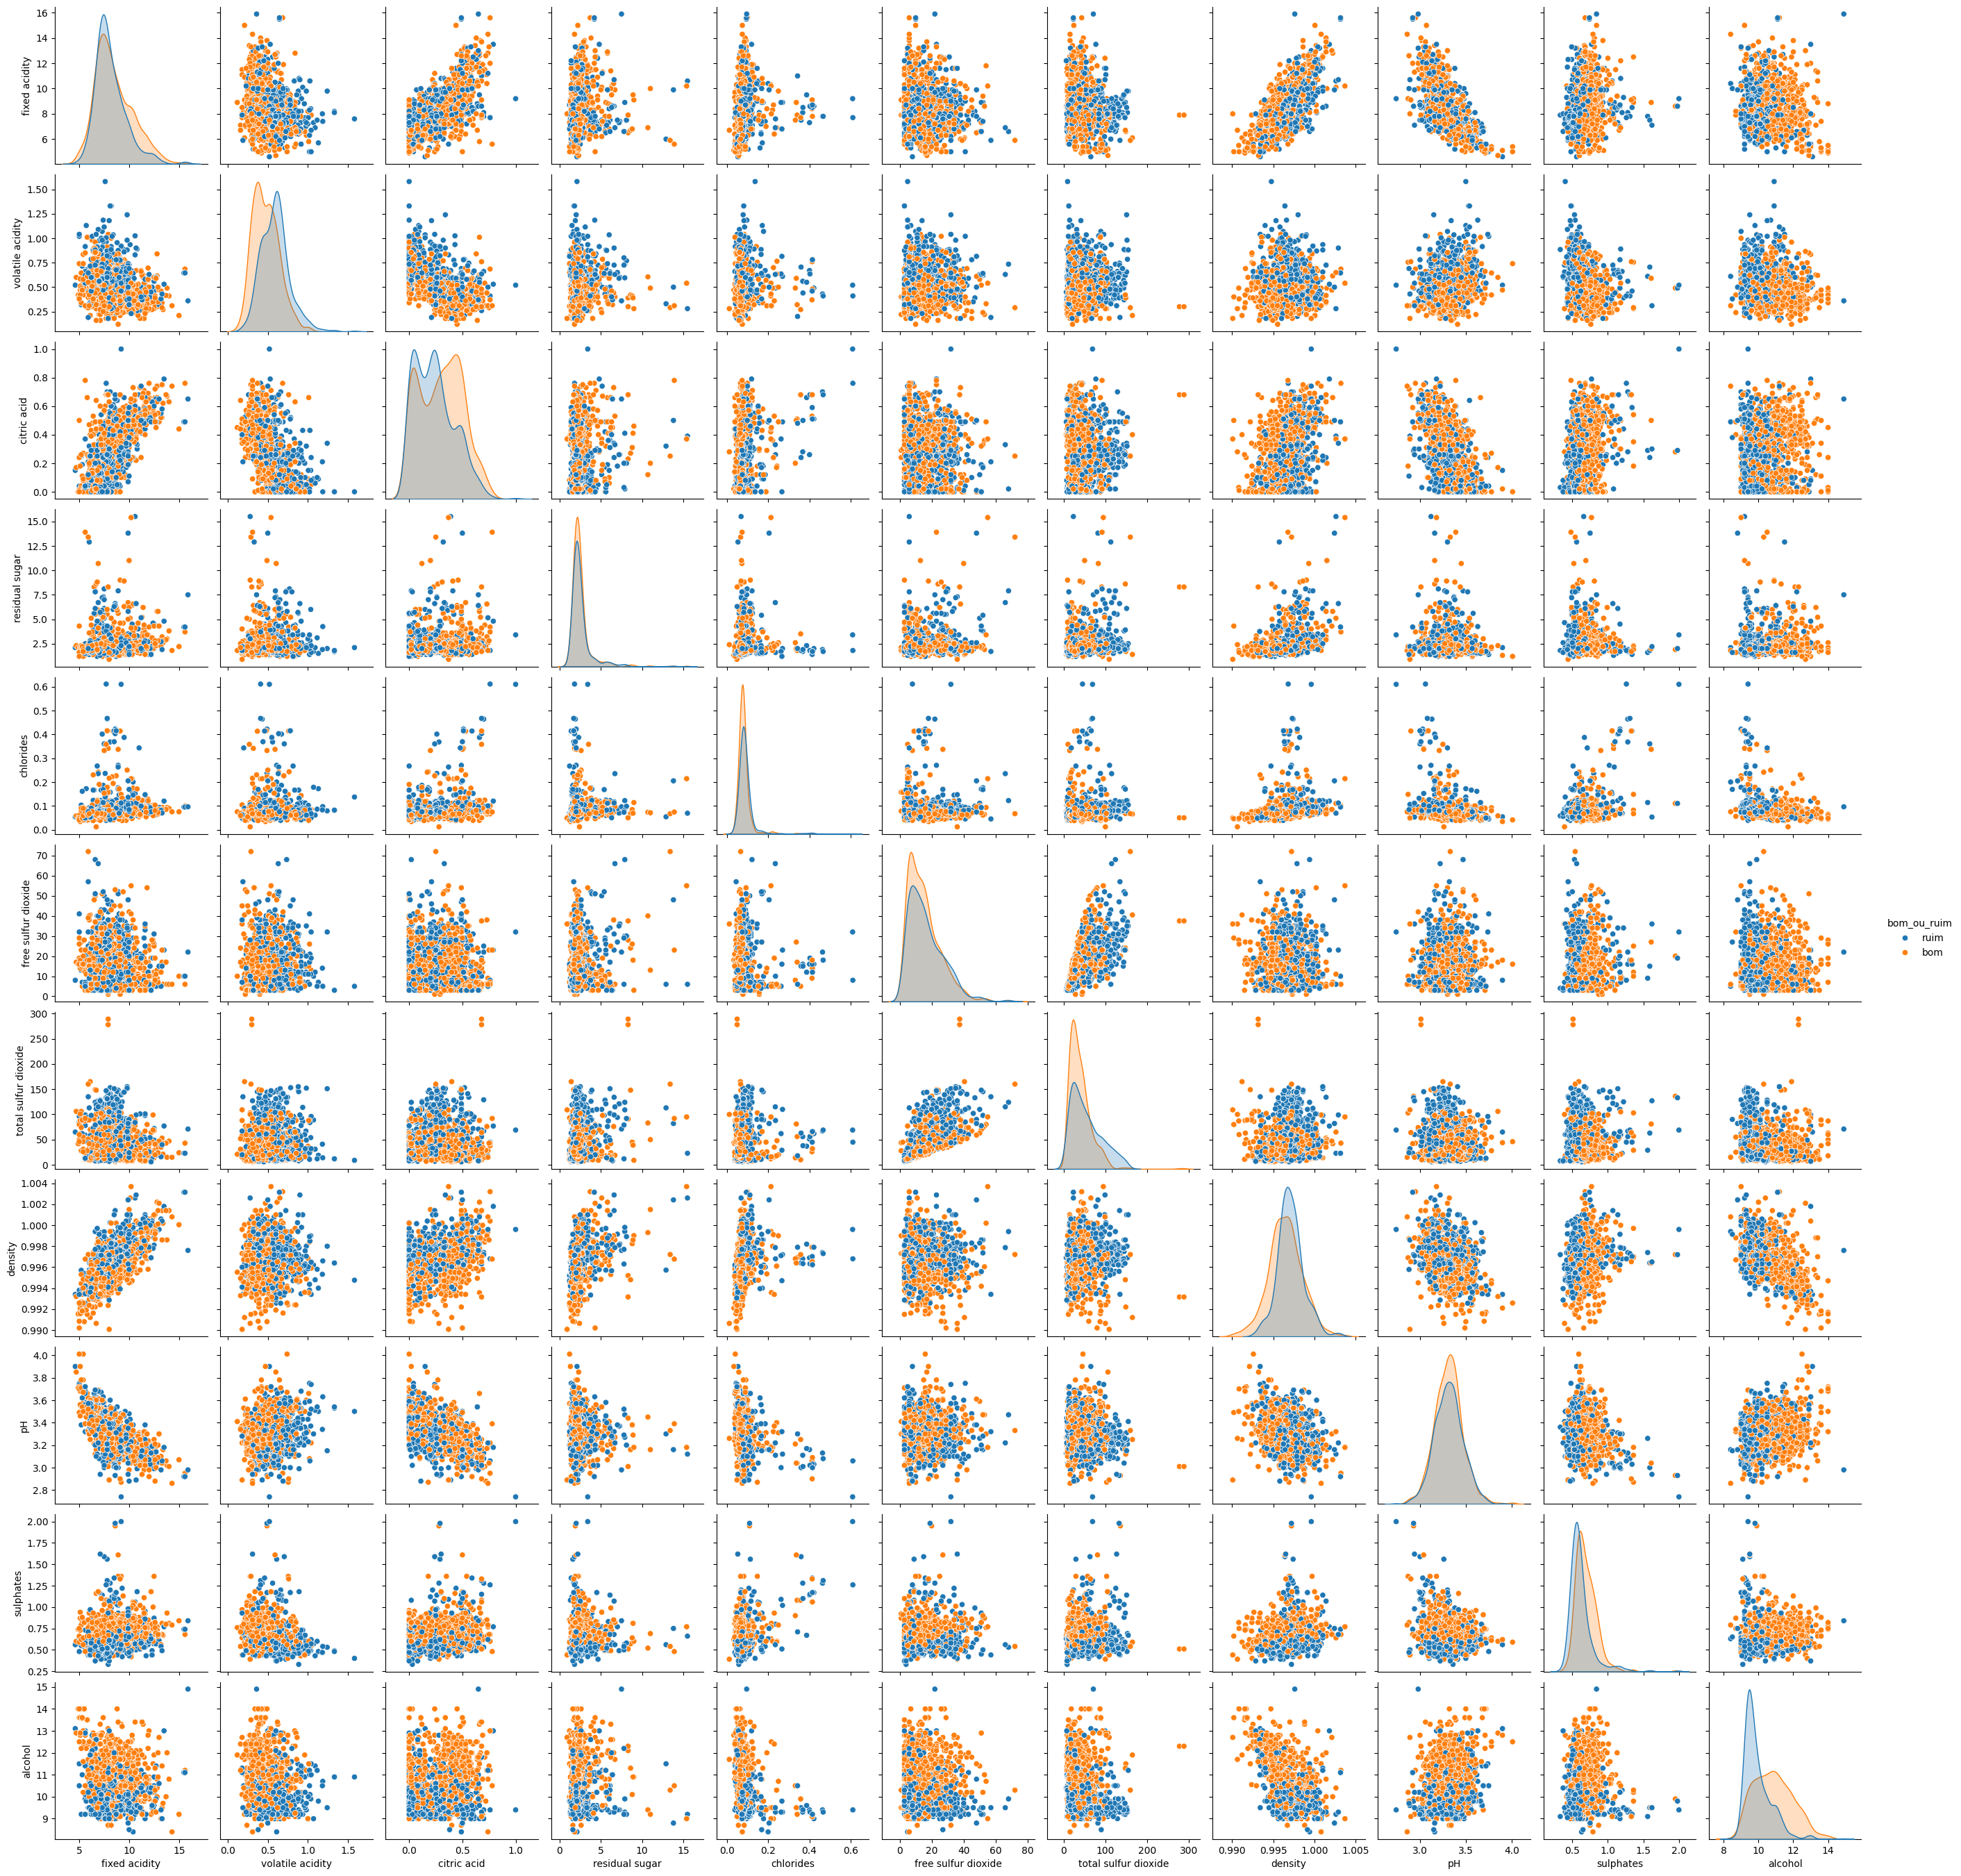

In [32]:
#Analisando pares de variaveis das 11 variaveis
sns.pairplot(df, hue = 'bom_ou_ruim')

### Conclusão sobre a Separabilidade das Classes

Ao analisar as distribuições das features e as projeções dos dados nos subespaços de pares de features, podemos avaliar a separabilidade entre as classes "Bom" e "Ruim". 

- Quanto mais parecidas forem as distribuições das duas classes, pior será a separabilidade.  
- O ideal seria que as caixas de "Bom" e "Ruim" estivessem bem separadas, indicando uma distinção clara entre os grupos.  

**Conclusão:** As variáveis analisadas **não são linearmente separáveis**, pois há uma sobreposição significativa entre as classes. Isso sugere que métodos mais sofisticados podem ser necessários para a classificação, como modelos não lineares ou técnicas de engenharia de features.


# OBS: 
- Isso porque eu estou considerando a "nota de corte" sendo 5. Caso e utilizasse outra "nota de corte" poderia melhorar essa separabilidade. Mas isso deverá ser decidido junto com todo o time de negócios. Caso fosse outra nota de corte ? Em outro arquivo.



## 8) Considerando a base de vinhos tintos com a variável *quality* discretizada em duas classes, realizei as seguintes análises:

1. **Agrupamento e Cálculo das Médias:**
   - Agrupei os dados pelos níveis categóricos do target (*quality*) e calculei a média de cada uma das features.

2. **Teste de Hipótese:**
   - Realizei um teste de hipótese para determinar, a um nível de significância de 5%, se há diferença na média de cada uma das sub-amostras de cada classe, para todas as variáveis.

3. **Comparação de Distribuições:**
   - Comparei a distribuição das features analisando o boxplot de cada uma, separando-as pelas duas classes do target.

> **Dica:** Utilizei as ferramentas do `scipy` e do `scikit-learn` para as análises.

In [33]:
df.groupby("bom_ou_ruim").mean()

fixed acidity  volatile acidity  citric acid  residual sugar   
bom_ou_ruim                                                                 
bom               8.474035          0.474146     0.299883        2.535965  \
ruim              8.142204          0.589503     0.237755        2.542070   

             chlorides  free sulfur dioxide  total sulfur dioxide   density   
bom_ou_ruim                                                                   
bom           0.082661            15.272515             39.352047  0.996467  \
ruim          0.092989            16.567204             54.645161  0.997068   

                   pH  sulphates    alcohol  
bom_ou_ruim                                  
bom          3.310643   0.692620  10.855029  
ruim         3.311653   0.618535   9.926478

In [35]:
df.groupby("bom_ou_ruim").var()
#A variância de fato não é igual, dentro de cada grupo a variabilidade é diferente.

fixed acidity  volatile acidity  citric acid  residual sugar   
bom_ou_ruim                                                                 
bom               3.470004          0.026244     0.039955        2.030154  \
ruim              2.472429          0.031668     0.033624        1.941983   

             chlorides  free sulfur dioxide  total sulfur dioxide   density   
bom_ou_ruim                                                                   
bom           0.001388           100.772253            742.741258  0.000004  \
ruim          0.003112           118.598438           1348.392763  0.000003   

                   pH  sulphates   alcohol  
bom_ou_ruim                                 
bom          0.023887   0.024198  1.223478  
ruim         0.023807   0.031044  0.574574

### Teste de Hipótese com `ttest_ind` (Teste T de Welch)

Vamos utilizar a função `ttest_ind` do módulo `scipy.stats` para realizar um teste t de Welch. Este teste compara as médias de duas amostras independentes e é adequado quando as variâncias das amostras são diferentes, ou seja, não assumiremos que as variâncias populacionais são iguais.

##### O que o teste faz:
1. **Cálculo da Estatística t:** A função calcula um valor t, que é a razão entre a diferença das médias e a variabilidade das amostras. Esse valor t nos indica o quanto as médias são distantes em relação à variabilidade dos dados.
   
2. **Cálculo do Valor p:** O valor p é a probabilidade de observar uma diferença tão extrema entre as médias se a hipótese nula fosse verdadeira. Um valor p pequeno sugere que a diferença observada é improvável sob a hipótese nula, indicando que as médias são significativamente diferentes.

##### Decisão:
- Se o **valor p** for **menor que o nível de significância** (geralmente 0,05), rejeitamos a hipótese nula, indicando que as médias das duas amostras são significativamente diferentes.
- Se o **valor p** for **maior ou igual a 0,05**, **não rejeitamos a hipótese nula**, indicando que não há diferença significativa entre as médias das duas amostras.

##### Exemplo de Resultados:
- **Se o valor p < 0,05:** Rejeitamos a hipótese nula e concluímos que as médias das duas populações são significativamente diferentes.
- **Se o valor p ≥ 0,05:** Não rejeitamos a hipótese nula e concluímos que não há diferença significativa entre as médias das duas populações.

O teste será conduzido da seguinte maneira:

#### Hipóteses:
- **Hipótese Nula (H₀):** A média das duas amostras é igual, ou seja, $( \mu_1 = \mu_2 )$
- **Hipótese Alternativa (H₁):** As médias das duas amostras são diferentes, ou seja, $( \mu_1 \neq \mu_2 )$

Isso pode ser reescrito como:

$$ 
H_0: \mu_1 - \mu_2 = 0 
$$

$$ 
H_1: \mu_1 - \mu_2 \neq 0 
$$

### Bloco de Código
Vamos realizar o teste t para verificar se as médias das duas classes da variável *quality* são significativamente diferentes. O código abaixo realiza esse teste para as features do conjunto de dados:

In [36]:
pop_vinhos_bons = df.query("bom_ou_ruim == 'bom'")
pop_vinhos_ruins = df.query("bom_ou_ruim == 'ruim'")

In [53]:
import scipy #Biblioteca mais úteis para trabalhar com diversar ferramentas científicas e estatísticas
import textwrap

col = "pH"

t, p = scipy.stats.ttest_ind(pop_vinhos_bons[col], 
                             pop_vinhos_ruins[col], 
                             alternative = 'two-sided', #Teste de igual diferente, temos que considerar cauda inferior e superior
                             equal_var = False) #As variâncias diferentes, é o que diferencia um ttest normal ouu ttestwelch

sig = 0.05
print(f"Para a coluna {col} (t = {t: .2f}, p = {p: .2f}), a um nível de significância {sig}, temos a conclusão:\n")

if p > sig:
    message = "Falha em reijeitar H0: não existe evidência para dizer que as médias são diferentes. Ou seja, não parece haver separabilidade com relação às médias"
else:
    message = "Rejeitamos H0: Há evidência de que as médias são diferentes. Ou seja, há indicio de separabilidade com relação as médias."

# Usando textwrap para ajustar a largura da linha
wrapper = textwrap.TextWrapper(width=80)  # Ajuste o width conforme o tamanho desejado
wrapped_message = wrapper.fill(text=message)

# Print com a mensagem ajustada
print(wrapped_message)

print(f"\n{'='*100}\n")

Para a coluna pH (t = -0.13, p =  0.90), a um nível de significância 0.05, temos a conclusão:

Falha em reijeitar H0: não existe evidência para dizer que as médias são
diferentes. Ou seja, não parece haver separabilidade com relação às médias




In [47]:
p # Significa a probabilidade de encontrar a estatística de teste t considerando que a hipotesse nula é verdadeira.

0.896225032105741

Aplicando para todas a features:

In [59]:
for col in df.columns[:-1]:
    t, p = scipy.stats.ttest_ind(pop_vinhos_bons[col], 
                             pop_vinhos_ruins[col], 
                             alternative = 'two-sided', #Teste de igual diferente, temos que considerar cauda inferior e superior
                             equal_var = False) #As variâncias diferentes, é o que diferencia um ttest normal ouu ttestwelch

    sig = 0.05
    print(f"Para a coluna {col} (t = {t: .4f}, p = {p: .4f}), a um nível de significância {sig}, temos a conclusão:\n")

    if p > sig:
        message = "NÃO rejeitamos H0: não existe evidência para dizer que as médias são diferentes. Ou seja, não parece haver separabilidade com relação às médias"
    else:
        message = "Rejeitamos H0: Há evidência de que as médias são diferentes. Ou seja, há indicio de separabilidade com relação as médias."

    # Usando textwrap para ajustar a largura da linha
    wrapper = textwrap.TextWrapper(width=80)  # Ajuste o width conforme o tamanho desejado
    wrapped_message = wrapper.fill(text=message)

    # Print com a mensagem ajustada
    print(wrapped_message)

    print(f"\n{'='*120}\n")

Para a coluna fixed acidity (t =  3.8622, p =  0.0001), a um nível de significância 0.05, temos a conclusão:

Rejeitamos H0: Há evidência de que as médias são diferentes. Ou seja, há indicio
de separabilidade com relação as médias.


Para a coluna volatile acidity (t = -13.4775, p =  0.0000), a um nível de significância 0.05, temos a conclusão:

Rejeitamos H0: Há evidência de que as médias são diferentes. Ou seja, há indicio
de separabilidade com relação as médias.


Para a coluna citric acid (t =  6.4799, p =  0.0000), a um nível de significância 0.05, temos a conclusão:

Rejeitamos H0: Há evidência de que as médias são diferentes. Ou seja, há indicio
de separabilidade com relação as médias.


Para a coluna residual sugar (t = -0.0865, p =  0.9311), a um nível de significância 0.05, temos a conclusão:

NÃO rejeitamos H0: não existe evidência para dizer que as médias são diferentes.
Ou seja, não parece haver separabilidade com relação às médias


Para a coluna chlorides (t = -4.2865, p

ESCREVER A CONCLUSÃO!

Coddigo